In [5]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.utils import plot_model
from keras import regularizers
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image

In [6]:
batch_size  = 64
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_ds = datagen_train.flow_from_directory("C:/Users/Rajesh Kumar/Desktop/deep/images/train",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)


test_ds = datagen_val.flow_from_directory("C:/Users/Rajesh Kumar/Desktop/deep/images/validation",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)
print('Train and Validation sets have been created.')


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Train and Validation sets have been created.


In [7]:
# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')


Above data generator functions have been created.


In [8]:
from keras.applications.resnet import ResNet152
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)

234698864/234698864 [==============================] - 22s 0us/step


In [9]:
conv_base.summary()

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                                                                                          

                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 12, 12, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 12, 12, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 12, 12, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_block3_3_bn (BatchNormal  (None, 12, 12, 256)  1024       ['conv2_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 6, 6, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 6, 6, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 6, 6, 512)    66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_block3_3_bn (BatchNormal  (None, 6, 6, 512)   2048        ['conv3_block3_3_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv3_block6_3_conv (Conv2D)   (None, 6, 6, 512)    66048       ['conv3_block6_2_relu[0][0]']    
                                                                                                  
 conv3_block6_3_bn (BatchNormal  (None, 6, 6, 512)   2048        ['conv3_block6_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block6_add (Add)         (None, 6, 6, 512)    0           ['conv3_block5_out[0][0]',       
                                                                  'conv3_block6_3_bn[0][0]']      
                                                                                                  
 conv3_blo

                                                                                                  
 conv4_block1_0_bn (BatchNormal  (None, 3, 3, 1024)  4096        ['conv4_block1_0_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_3_bn (BatchNormal  (None, 3, 3, 1024)  4096        ['conv4_block1_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_add (Add)         (None, 3, 3, 1024)   0           ['conv4_block1_0_bn[0][0]',      
                                                                  'conv4_block1_3_bn[0][0]']      
                                                                                                  
 conv4_blo

 ization)                                                                                         
                                                                                                  
 conv4_block4_add (Add)         (None, 3, 3, 1024)   0           ['conv4_block3_out[0][0]',       
                                                                  'conv4_block4_3_bn[0][0]']      
                                                                                                  
 conv4_block4_out (Activation)  (None, 3, 3, 1024)   0           ['conv4_block4_add[0][0]']       
                                                                                                  
 conv4_block5_1_conv (Conv2D)   (None, 3, 3, 256)    262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 3, 3, 256)   1024        ['conv4_block5_1_conv[0][0]']    
 ization) 

 conv4_block7_out (Activation)  (None, 3, 3, 1024)   0           ['conv4_block7_add[0][0]']       
                                                                                                  
 conv4_block8_1_conv (Conv2D)   (None, 3, 3, 256)    262400      ['conv4_block7_out[0][0]']       
                                                                                                  
 conv4_block8_1_bn (BatchNormal  (None, 3, 3, 256)   1024        ['conv4_block8_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block8_1_relu (Activatio  (None, 3, 3, 256)   0           ['conv4_block8_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 lization)                                                                                        
                                                                                                  
 conv4_block11_1_relu (Activati  (None, 3, 3, 256)   0           ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 3, 3, 256)    590080      ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_2_bn (BatchNorma  (None, 3, 3, 256)   1024        ['conv4_block11_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block14_2_conv (Conv2D)  (None, 3, 3, 256)    590080      ['conv4_block14_1_relu[0][0]']   
                                                                                                  
 conv4_block14_2_bn (BatchNorma  (None, 3, 3, 256)   1024        ['conv4_block14_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block14_2_relu (Activati  (None, 3, 3, 256)   0           ['conv4_block14_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block14_3_conv (Conv2D)  (None, 3, 3, 1024)   263168      ['conv4_block14_2_relu[0][0]']   
                                                                                                  
 conv4_blo

 conv4_block17_2_relu (Activati  (None, 3, 3, 256)   0           ['conv4_block17_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block17_3_conv (Conv2D)  (None, 3, 3, 1024)   263168      ['conv4_block17_2_relu[0][0]']   
                                                                                                  
 conv4_block17_3_bn (BatchNorma  (None, 3, 3, 1024)  4096        ['conv4_block17_3_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block17_add (Add)        (None, 3, 3, 1024)   0           ['conv4_block16_out[0][0]',      
                                                                  'conv4_block17_3_bn[0][0]']     
          

 conv4_block20_3_bn (BatchNorma  (None, 3, 3, 1024)  4096        ['conv4_block20_3_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_add (Add)        (None, 3, 3, 1024)   0           ['conv4_block19_out[0][0]',      
                                                                  'conv4_block20_3_bn[0][0]']     
                                                                                                  
 conv4_block20_out (Activation)  (None, 3, 3, 1024)  0           ['conv4_block20_add[0][0]']      
                                                                                                  
 conv4_block21_1_conv (Conv2D)  (None, 3, 3, 256)    262400      ['conv4_block20_out[0][0]']      
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block23_out (Activation)  (None, 3, 3, 1024)  0           ['conv4_block23_add[0][0]']      
                                                                                                  
 conv4_block24_1_conv (Conv2D)  (None, 3, 3, 256)    262400      ['conv4_block23_out[0][0]']      
                                                                                                  
 conv4_block24_1_bn (BatchNorma  (None, 3, 3, 256)   1024        ['conv4_block24_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block24_1_relu (Activati  (None, 3, 3, 256)   0           ['conv4_block24_1_bn[0][0]']     
 on)                                                                                              
          

 conv4_block27_1_bn (BatchNorma  (None, 3, 3, 256)   1024        ['conv4_block27_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block27_1_relu (Activati  (None, 3, 3, 256)   0           ['conv4_block27_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block27_2_conv (Conv2D)  (None, 3, 3, 256)    590080      ['conv4_block27_1_relu[0][0]']   
                                                                                                  
 conv4_block27_2_bn (BatchNorma  (None, 3, 3, 256)   1024        ['conv4_block27_2_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block30_2_conv (Conv2D)  (None, 3, 3, 256)    590080      ['conv4_block30_1_relu[0][0]']   
                                                                                                  
 conv4_block30_2_bn (BatchNorma  (None, 3, 3, 256)   1024        ['conv4_block30_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block30_2_relu (Activati  (None, 3, 3, 256)   0           ['conv4_block30_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block30_3_conv (Conv2D)  (None, 3, 3, 1024)   263168      ['conv4_block30_2_relu[0][0]']   
          

                                                                                                  
 conv4_block33_2_relu (Activati  (None, 3, 3, 256)   0           ['conv4_block33_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block33_3_conv (Conv2D)  (None, 3, 3, 1024)   263168      ['conv4_block33_2_relu[0][0]']   
                                                                                                  
 conv4_block33_3_bn (BatchNorma  (None, 3, 3, 1024)  4096        ['conv4_block33_3_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block33_add (Add)        (None, 3, 3, 1024)   0           ['conv4_block32_out[0][0]',      
          

                                                                                                  
 conv4_block36_3_bn (BatchNorma  (None, 3, 3, 1024)  4096        ['conv4_block36_3_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block36_add (Add)        (None, 3, 3, 1024)   0           ['conv4_block35_out[0][0]',      
                                                                  'conv4_block36_3_bn[0][0]']     
                                                                                                  
 conv4_block36_out (Activation)  (None, 3, 3, 1024)  0           ['conv4_block36_add[0][0]']      
                                                                                                  
 conv5_block1_1_conv (Conv2D)   (None, 2, 2, 512)    524800      ['conv4_block36_out[0][0]']      
          

                                                                                                  
 conv5_block3_3_bn (BatchNormal  (None, 2, 2, 2048)  8192        ['conv5_block3_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block3_add (Add)         (None, 2, 2, 2048)   0           ['conv5_block2_out[0][0]',       
                                                                  'conv5_block3_3_bn[0][0]']      
                                                                                                  
 conv5_block3_out (Activation)  (None, 2, 2, 2048)   0           ['conv5_block3_add[0][0]']       
                                                                                                  
Total params: 58,370,944
Trainable params: 58,219,520
Non-trainable params: 151,424
_________________________

In [10]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))



In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 2, 2, 2048)        58370944  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                        

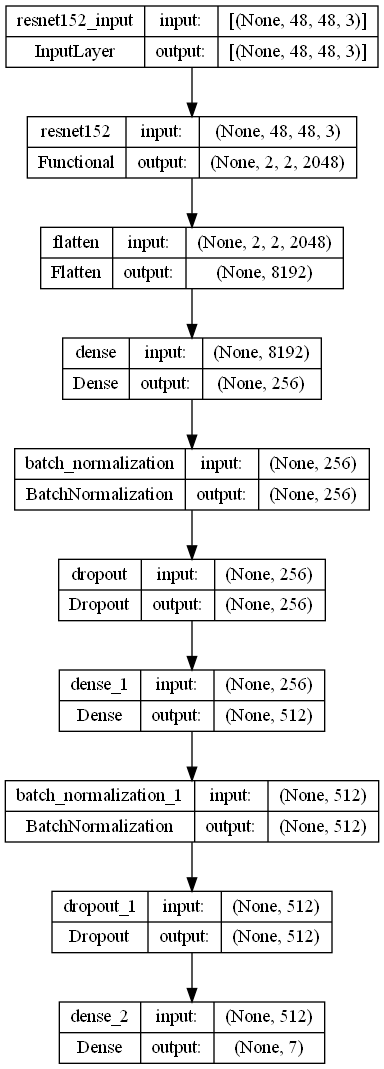

In [12]:

# Visualize the model.
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [13]:
conv_base.trainable = False

In [14]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')

CNN model has been created you can proceed to train you data with this model.


In [ ]:
epochs = 100

history = model.fit_generator(generator=train_ds,
                                steps_per_epoch=train_ds.n//train_ds.batch_size,
                                epochs=epochs,
                                validation_data = test_ds,
                                validation_steps = test_ds.n//test_ds.batch_size,
                                
                                )
print('Your model has been trained!!')
     

C:\Users\Rajesh Kumar\AppData\Local\Temp\ipykernel_8336\1048391264.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_ds,


Epoch 1/100
450/450 [==============================] - 224s 487ms/step - loss: 1.8709 - accuracy: 0.3320 - val_loss: 1.5353 - val_accuracy: 0.4151
Epoch 2/100
450/450 [==============================] - 190s 422ms/step - loss: 1.5524 - accuracy: 0.4119 - val_loss: 1.4673 - val_accuracy: 0.4419
Epoch 3/100
107/450 [======>.......................] - ETA: 1:56 - loss: 1.4614 - accuracy: 0.4379